## Instalación de dependencias

In [ ]:
pip install pandas pandas-profiling 

## Importar librerías

In [ ]:
import pandas as pd                                # Para manipulación de datos
from pandas_profiling import ProfileReport         # Para exploración automática
import matplotlib.pyplot as plt

C:\Users\David Sanchez\AppData\Local\Temp\ipykernel_20324\683860836.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport         # Para exploración automática


OSError: Could not find kaggle.json. Make sure it's located in C:\Users\David Sanchez\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

## Descargar y cargar el dataset

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 1. Verificar dimensiones
print(f"Dataset cargado con {df.shape[0]} filas y {df.shape[1]} columnas.")


Dataset cargado con 7043 filas y 21 columnas.


## Duplicados

In [5]:
# Contamos registros duplicados exactos
num_duplicados = df.duplicated().sum()
print(f"Duplicados encontrados: {num_duplicados}")

# Eliminarlos y actualizar el DataFrame
# df = df.drop_duplicates()


Duplicados encontrados: 0


## Valores nulos

In [6]:
# Sumamos nulos por columna
nulos = df.isnull().sum()

# Mostramos solo las columnas que tienen al menos 1 nulo
print("Columnas con valores nulos:\n", nulos[nulos > 0])

Columnas con valores nulos:
 Series([], dtype: int64)


## Tipos de datos y conversiones

In [7]:
# 1. Revisar tipos actuales
print("Tipos de datos originales:\n", df.dtypes)

# 2. Convertir TotalCharges de object a numérico (puede haber strings vacíos)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# 3. Convertir SeniorCitizen a categórico
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")

# 4. Confirmar cambios
print("\nTipos de datos tras conversión:\n", df.dtypes)

Tipos de datos originales:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Tipos de datos tras conversión:
 customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection 

## Distribuciones

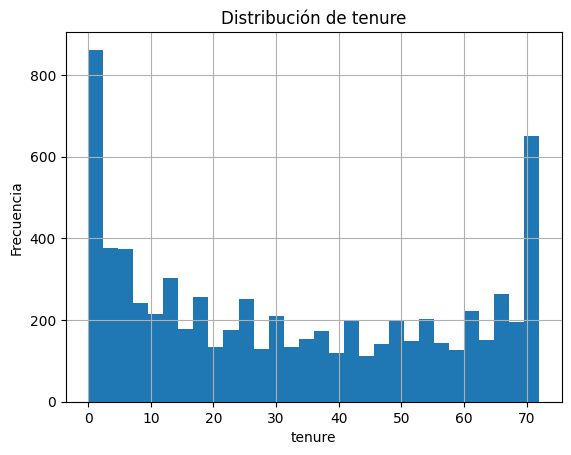

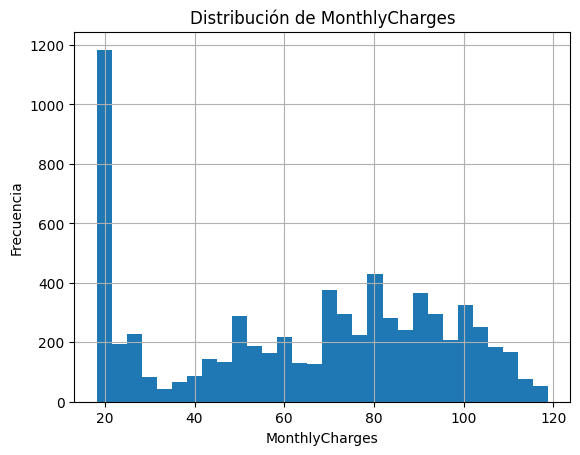

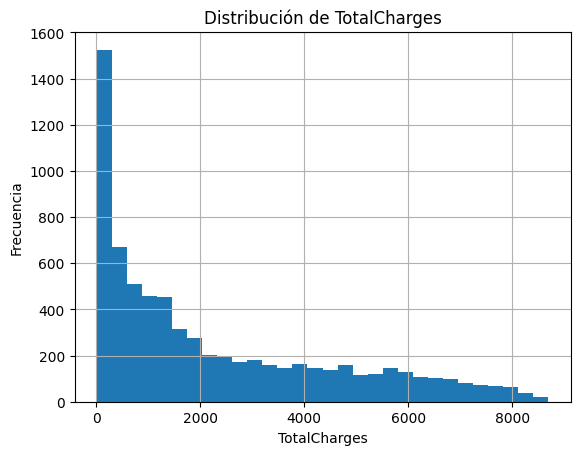

In [8]:
# Distribuciones de variables numéricas

# Seleccionar sólo las columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plotear histogramas
for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


## Correlaciones

Correlaciones (Pearson) entre variables numéricas:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000


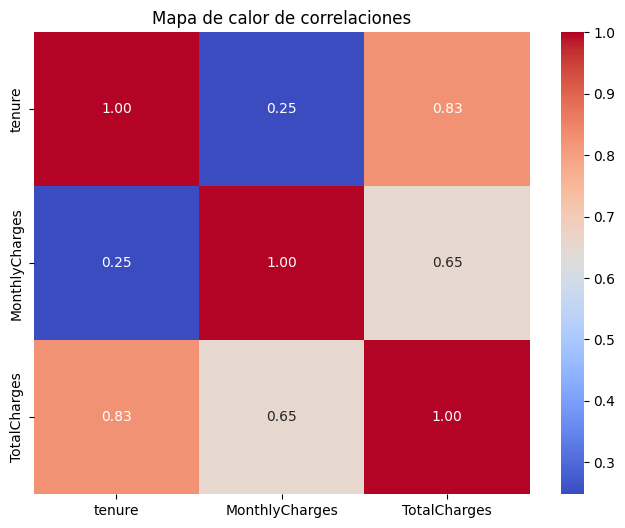

In [9]:
# Matriz de correlación numérica
corr_matrix = df[num_cols].corr(method='pearson')

# Mostrar la tabla
print("Correlaciones (Pearson) entre variables numéricas:\n", corr_matrix)

# Heatmap para ver las más altas/bajas
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

## Resumen estadístico

In [10]:
# Resumen estadístico de columnas numéricas
desc_num = df[num_cols].describe()
print("Resumen estadístico (numérico):\n", desc_num)

# Para variables categóricas, ver conteos
cat_cols = df.select_dtypes(include=['object', 'category']).columns
desc_cat = df[cat_cols].describe()
print("\nResumen estadístico (categórico):\n", desc_cat)

Resumen estadístico (numérico):
             tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

Resumen estadístico (categórico):
         customerID gender  SeniorCitizen Partner Dependents PhoneService  \
count         7043   7043           7043    7043       7043         7043   
unique        7043      2              2       2          2            2   
top     3186-AJIEK   Male              0      No         No          Yes   
freq             1   3555           5901    3641       4933         6361   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7043            7043     

## Generar reporte con pandas_profiling

In [12]:
profile = ProfileReport(
    df,
    title="Telco Customer Churn — Exploración Automática",
    explorative=True,
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True},
        "phi_k": {"calculate": False}
    }
)

# Mostrar dentro del notebook
profile.to_notebook_iframe()

# Guardar en disco para compartir
profile.to_file("reports/telco_churn_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 127.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]